# Bike sharing Demand prediction project for hourly dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Step 1 - Read the data

In [4]:
bikes = pd.read_csv('hour.csv')

In [11]:
bikes.head(20)

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,01-01-2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,01-01-2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,01-01-2011,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,01-01-2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,01-01-2011,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [9]:
bikes.shape

(17379, 17)

In [13]:
bikes.isnull().sum(axis = 0)

index         0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
demand        0
dtype: int64

# Step 2 - Prelim analysis and Feature selection
We will drop index, date, casual, registered columns from the table as they are useless for us. Axis = 1 means that we are dropping columns.

In [5]:
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','date','casual','registered'],axis=1)

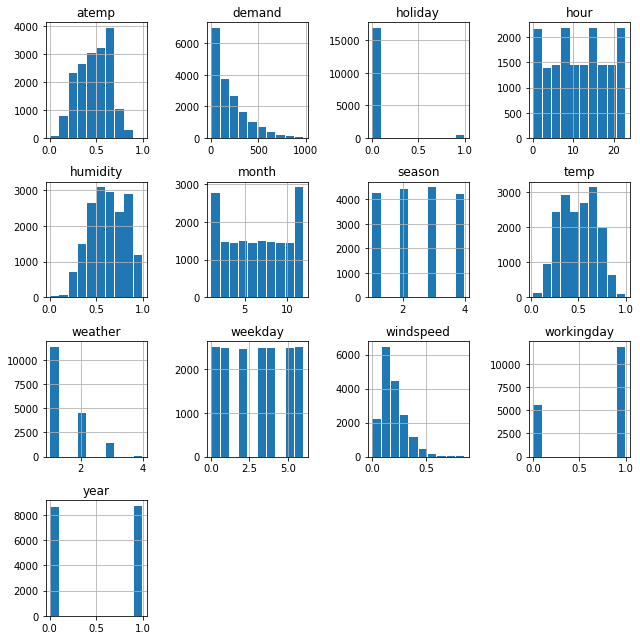

In [7]:
plt.rcParams["figure.figsize"]=9,9  # To make size of plots big
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

# Step 3 - Data Visualization(continous variables)
Visualize the continous features VS demand

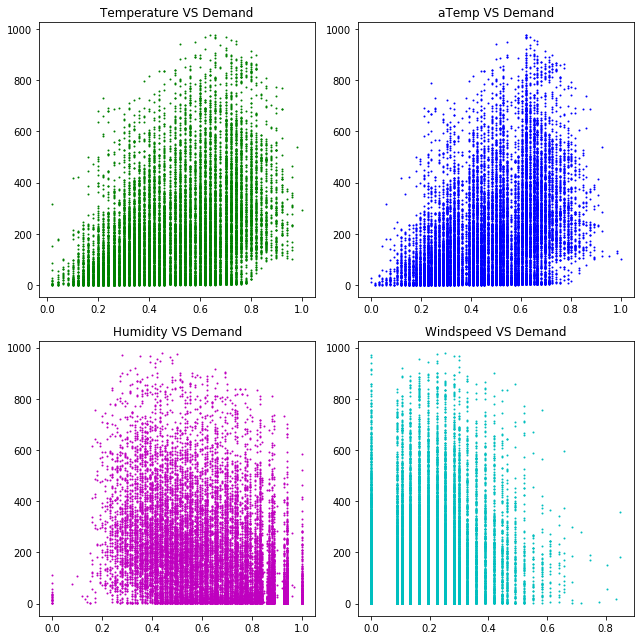

In [54]:
plt.rcParams["figure.figsize"]=9,9  # To make size of plots big

plt.subplot(2,2,1)
plt.title('Temperature VS Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=1,c='g')


plt.subplot(2,2,2)
plt.title('aTemp VS Demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=1,c='b')


plt.subplot(2,2,3)
plt.title('Humidity VS Demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=1,c='m')


plt.subplot(2,2,4)
plt.title('Windspeed VS Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=1,c='c')

plt.tight_layout()


# Step 3 - Data Visualization(categorical variables)
For categorical Data

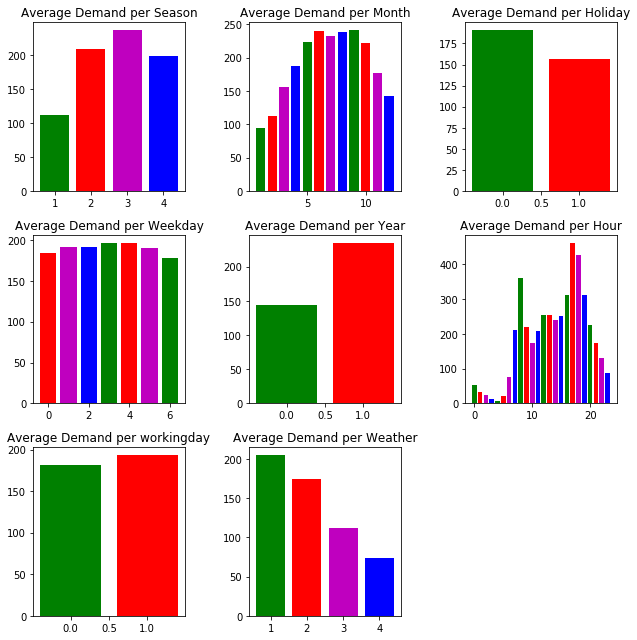

In [55]:
colors = ['g','r','m','b']

plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list=bikes_prep['season'].unique()  # It will hold different seasons i.e 1,2,3,4
cat_average=bikes_prep.groupby('season').mean()['demand']  # it will calculate avg demand at each season
plt.bar(cat_list,cat_average,color=colors)


plt.subplot(3,3,2)
plt.title('Average Demand per Month')
cat_list=bikes_prep['month'].unique()  
cat_average=bikes_prep.groupby('month').mean()['demand']  
plt.bar(cat_list,cat_average,color=colors)


plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list=bikes_prep['holiday'].unique()  
cat_average=bikes_prep.groupby('holiday').mean()['demand']  
plt.bar(cat_list,cat_average,color=colors)


plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list=bikes_prep['weekday'].unique()  
cat_average=bikes_prep.groupby('weekday').mean()['demand']  
plt.bar(cat_list,cat_average,color=colors)


plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list=bikes_prep['year'].unique()  
cat_average=bikes_prep.groupby('year').mean()['demand']  
plt.bar(cat_list,cat_average,color=colors)


plt.subplot(3,3,6)
plt.title('Average Demand per Hour')
cat_list=bikes_prep['hour'].unique()  
cat_average=bikes_prep.groupby('hour').mean()['demand']  
plt.bar(cat_list,cat_average,color=colors)


plt.subplot(3,3,7)
plt.title('Average Demand per workingday')
cat_list=bikes_prep['workingday'].unique()  
cat_average=bikes_prep.groupby('workingday').mean()['demand']  
plt.bar(cat_list,cat_average,color=colors)


plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list=bikes_prep['weather'].unique()  
cat_average=bikes_prep.groupby('weather').mean()['demand']  
plt.bar(cat_list,cat_average,color=colors)

plt.tight_layout()

Features to be dropped :
1. Weekday (since it is similar throught and there is hardly any difference)
2. Year (since we only have data for 1 year)
3. Wrokingday (hardly any difference and is similar)

<BarContainer object of 24 artists>

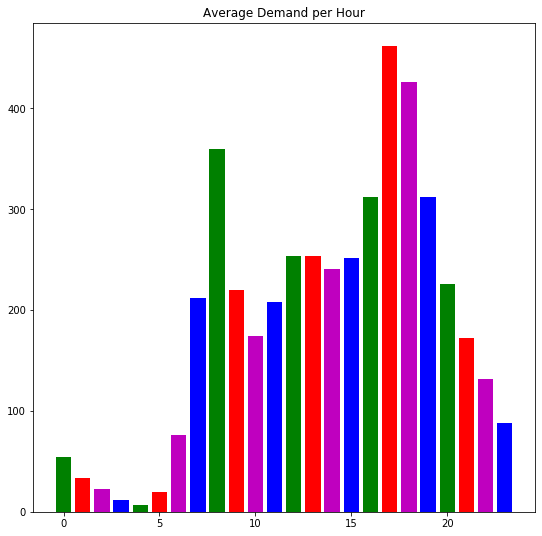

In [56]:
# Analyzing hour much deeper

plt.title('Average Demand per Hour')
cat_list=bikes_prep['hour'].unique()  
cat_average=bikes_prep.groupby('hour').mean()['demand']  
plt.bar(cat_list,cat_average,color=colors)


# Data Visualization Analysis Result(continous variable) :
1. Demand is not normally Distributed.
2. Temperature and demand have appeared to have direct correlation.
3. The plot for temp and atemp appear almost identical.
4. Humidity and windspeed affect demand but need more statistical analysis.

# Data Visualization Analysis Result(categorical variable) :

A. There is variation in demand based on - 
1. Season
2. Month
3. Holiday
4. Hour
5. Weather

B. No significant change in demand due to weekday or working day and we will drop them.

C. Year-Wise growth pattern not considered due to limited number of years.

D. Average demand per hour suggest that we should park bikes near Public transport during morning and near offices during evening time.


# Check the outliers

In [57]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

Here we are only interested in 25%,50%,75% quartiles

In [58]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

It tells us that till 99% of times the demand is upto 789 but for the remaining 1% the demand umps to 977 which means there are some outliers.

# Step 4 - Check Multiple Linear Regression Assumptions

Linearity using correlation coefficient matrix using corr

In [59]:
correlation=bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


temp and atemp has high multicolliniarity and thats why atemp is dropped and windpeed will also be dropped.

Features to be dropped :

1. Weekday (since it is similar throught and there is hardly any difference)
2. Year (since we only have data for 1 year)
3. Wrokingday (hardly any difference and is similar)
4. atemp
5. windspeed

Demand is not normally distributed

# Droping  the irrelivant columns

In [60]:
bikes_prep=bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'],axis=1)

In [61]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


# Checking the Auto-correlation in Demand using the acorr plot 

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x12d810510>)

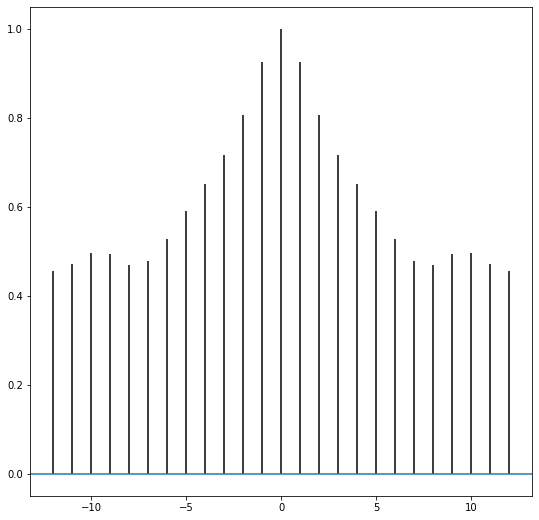

In [62]:
df1 = pd.to_numeric(bikes_prep['demand'],downcast='float')
plt.acorr(df1,maxlags=12)

High Auto-correlation in Demand feature and need to be deal with.

# Step 6 - Create/modify new features.
Demand is not normalized and to normalize it we will use its log values.
Log normalize the feature 'Demand'

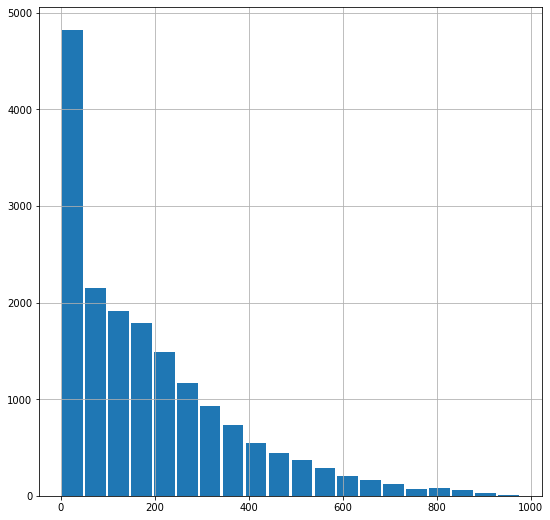

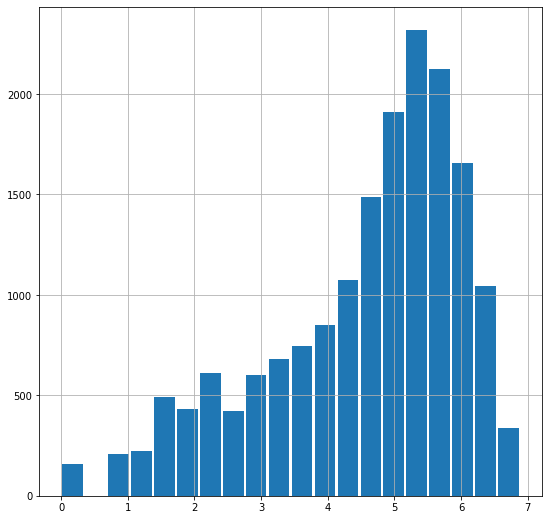

In [63]:
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9,bins=20)

plt.figure()
df2.hist(rwidth=0.9,bins=20)

Now lets actually convert the demand to its log values

In [64]:
bikes_prep['demand']=np.log(bikes_prep['demand'])

In [65]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000


# Solving the problem of auto-correlation

In [66]:
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


We can drop the null rows from the dataset

In [67]:
bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag.shape

(17376, 11)

In [68]:
bikes_prep_lag.head(4)

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949


# Step 7 - Create dummy variables and drop first to avoid dummy variables trap
- Season
- Holiday
- weather
- hour
- month

In [69]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [71]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag.dtypes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [72]:
bikes_prep_lag=pd.get_dummies(bikes_prep_lag,drop_first=True)
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
bikes_prep_lag.shape

(17376, 47)

# Create Train and Test datasplit


In [74]:
# Demand is time dependent and we cannot randomly split the data, we will split it sequencially.
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'],axis=1)
Y.shape

(17376, 1)

In [75]:
X.shape

(17376, 46)

In [76]:
# Create training set at 70%
tr_size = 0.7 * len(X)
tr_size = int(tr_size)

In [77]:
# create train and test datasets
X_train = X.values[0:tr_size] 
X_test = X.values[tr_size:len(X)]

Y_train = Y.values[0:tr_size] 
Y_test = Y.values[tr_size:len(Y)]

# Step 9 - Fit and Score the model
Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train,Y_train)

r2_train = std_reg.score(X_train,Y_train)  # r-squared values
r2_test  = std_reg.score(X_test,Y_test)    # r-squared values

# Create Y prediction
Y_predict = std_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test,Y_predict))

In [79]:
r2_test

0.9287151360253384

#  Calculate RMSLE

In [82]:
Y_test_e = []
Y_predict_e =[]

for i in range(len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))
    
    
# calculate the sum
log_sq_sum = 0.0

for i in range(0,len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff
    
rmsle = math.sqrt(log_sq_sum/len(Y_test))
print(rmsle)

0.35609417069802085
